In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time

from draw_strokes import draw_strokes

from experiment import run_epoch
from lstm import LSTMGenerator, LSTMDiscriminator
from lstm_data import LSTMDataset, create_mask, create_batch_mask, revert

DATA_PATH = "sheep_market.npz"
data = np.load(DATA_PATH, allow_pickle=True, encoding="bytes")
train_raw_data = data["train"]
valid_raw_data = data["valid"]
test_raw_data = data["test"]

MEAN = [0.3776045376257754, 0.30774983488947305]
STD = [21.851689358105794, 14.4384627726713]


In [2]:
DIM = 4
H_DIM = 16
LAYERS = 4

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_WORKERS = 0 if DEVICE == "cpu" else 2

generator = LSTMGenerator(h_dim=H_DIM, dim=DIM, num_layers=LAYERS)
discriminator = LSTMDiscriminator(h_dim=H_DIM, dim=DIM, num_layers=LAYERS)

generator.to(DEVICE)
discriminator.to(DEVICE)
    
train = LSTMDataset(train_raw_data, MEAN, STD)
valid = LSTMDataset(valid_raw_data, MEAN, STD)
test = LSTMDataset(test_raw_data, MEAN, STD)


In [8]:
GENERATOR_PATH = "weights/gen.pth"
DIM = 4
H_DIM = 64
LAYERS = 4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

generator = LSTMGenerator(h_dim=H_DIM, dim=DIM, num_layers=LAYERS)
print(generator.sequential)
# generator.load(GENERATOR_PATH)


SequentialTanh(
  (sequential): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): Tanh()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): Tanh()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): Tanh()
    (6): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [4]:
z = torch.normal(torch.zeros(1, 251, H_DIM), 1) # B, H
gen = generator(z)
gen = revert(gen, MEAN, STD)
print(gen)

# draw_strokes(gen)


[]


In [5]:
for x in train_raw_data[5]:
    print(x)


[-11 -26   0]
[-20 -36   0]
[11 67  0]
[2 4 0]
[9 9 0]
[9 0 0]
[  2 -17   1]
[-35 -60   0]
[ 0 28  0]
[10 79  0]
[ 0 17  0]
[-5  5  0]
[-7 -2  0]
[-6 -7  0]
[-3 -8  0]
[ -1 -41   0]
[ -2 -13   0]
[ -4 -10   0]
[-6  9  0]
[-1 65  0]
[-25 -31   0]
[ -3 -18   0]
[  0 -33   0]
[-33 -10   0]
[-15  -3   0]
[-80   0   0]
[-9  1  0]
[-12   5   0]
[-6  9  0]
[-8 23  0]
[-3 18  0]
[-1 32  0]
[-19  -1   0]
[-17 -58   0]
[  0 -12   0]
[-2 54  0]
[-2  2  0]
[-6  0  0]
[ -7 -10   0]
[-2 -6  0]
[ -1 -54   0]
[-62 -60   0]
[ -4 -46   0]
[29 -1  0]
[24  2  0]
[26  0  0]
[ 0 42  0]
[ 9 12  0]
[93  0  0]
[53 -5  0]
[-5  2  0]
[84  1  0]
[17  7  0]
[7 7 0]
[2 8 0]
[6 0 1]
[-308  -75    0]
[-37  25   0]
[0 2 0]
[ 4 -1  0]
[ 13 -12   1]
[ 31 -14   0]
[ 7 -6  1]
[11 -3  0]
[0 2 1]
[1 3 0]
[ 5 -3  0]
[6 0 0]
[0 8 0]
[-18  -2   1]
[-10  17   0]
[19  0  0]
[-22  -3   1]
[-30  37   0]
[11 -1  0]
[9 0 0]
[-3  2  0]
[-18   0   0]
[ 6 -1  1]


92


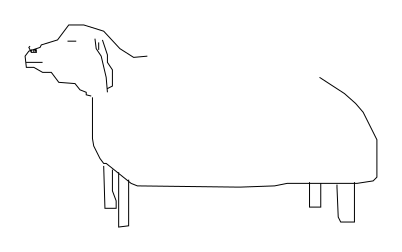

In [6]:
ITEM = 10
raw = train_raw_data[ITEM]
print(len(raw))
draw_strokes(raw)


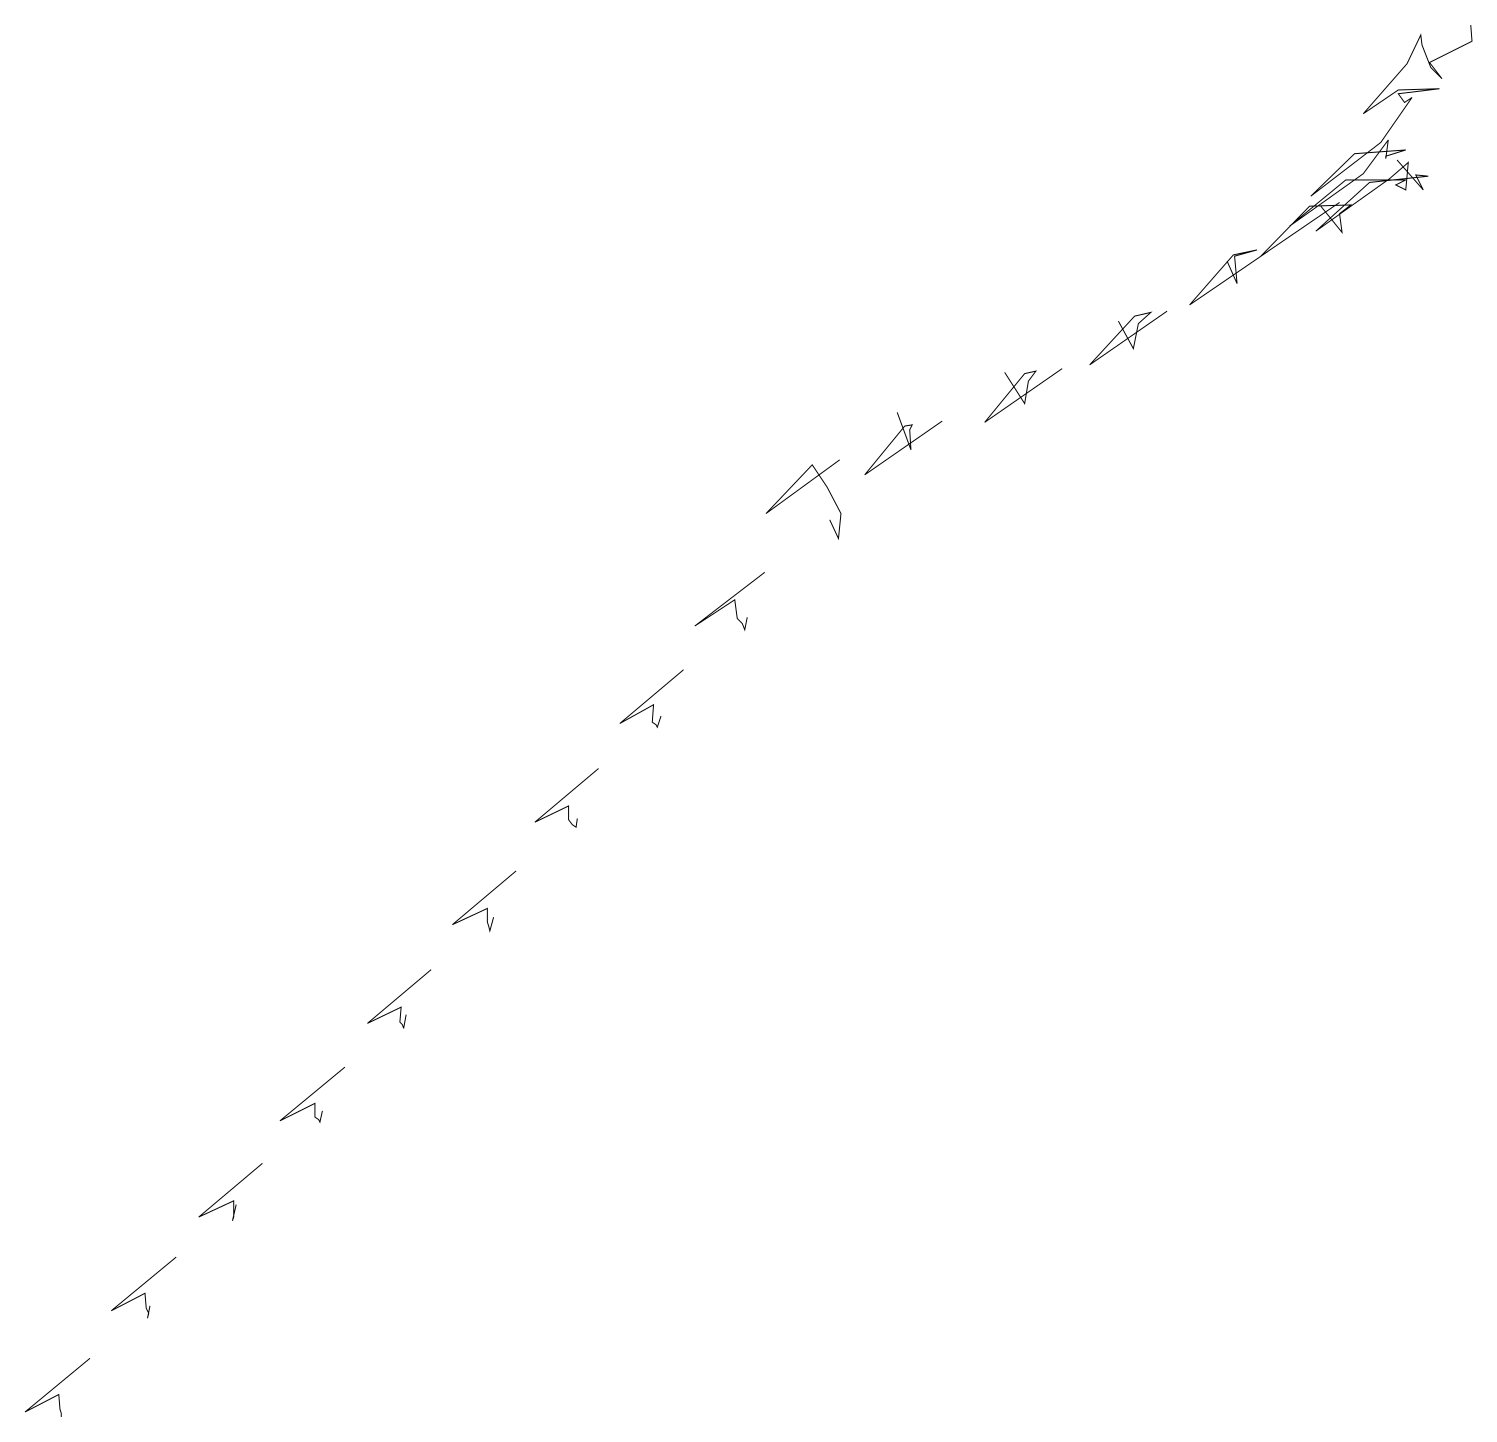

In [7]:
with open("sheep.txt", "r") as f:
    text_data = f.read()
text_data = text_data.replace(" ", ",")

data_array = np.array(eval(text_data))
draw_strokes(data_array)
